# Mini Projeto de Análise de Dados
**Grupo 11**

Fonte de Dados: Conjunto de dados sobre desempenho acadêmico de estudantes.

Link: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

Colunas (renomeadas):
- EstudanteID
- Idade *(15-18 anos)*
- Gênero *(0: masculino, 1: feminino)*
- Etnia *(0: caucasiano, 1: afro-americano, 2: asiático, 3: outra)*
- Educação Parental *(0: nenhuma, 1: ensino médio, 2: alguma faculdade, 3: bacharelado, 4: superior)*
- Horário de Estudos Semanal *(0-20 horas)*
- Ausência *(0-30 durante o ano letivo)*
- Tutoria *(status de tutoria, 0: não, 1: sim)*
- Apoio parental *(0: nenhum, 1: baixo, 2: moderado, 3: alto, 4: muito alto)*
- Extracurricular *(participação, 0: não, 1: sim)*
- Esportes *(participação, 0: não, 1: sim)*
- Música *(participação, 0: não, 1: sim)*
- Voluntariado *(participação, 0: não, 1: sim)*
- GPA *(média de notas na escala 2,0-4,0; influenciada por hábitos de estudo, apoio parental e atividades extracurriculares)*
- Nota *(quanto menor, melhor a nota)*

# Importação de bibliotecas

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  Leitura de base dados

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/datasets/Student_performance_data _.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
# Colunas
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [ ]:
colunas = {'StudentID': 'EstudanteID',
           'Age': 'Idade',
           'Gender': 'Gênero',
           'Ethnicity': 'Etnia',
           'ParentalEducation': 'Educação Parental',
           'StudyTimeWeekly': 'Horário de Estudos Semanal',
           'Absences': 'Ausência',
           'Tutoring': 'Tutoria',
           'ParentalSupport': 'Apoio parental',
           'Extracurricular': 'Extracurricular',
           'Sports': 'Esportes',
           'Music': 'Música',
           'Volunteering': 'Voluntariado',
           'GPA': 'GPA',
           'GradeClass': 'Nota'}

In [ ]:
df = df.rename(columns=colunas)

In [ ]:
df

,EstudanteID,Idade,Gênero,Etnia,Educação Parental,Horário de Estudos Semanal,Ausência,Tutoria,Apoio parental,Extracurricular,Esportes,Música,Voluntariado,GPA,Nota
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [ ]:
# Tipos de dados das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EstudanteID                 2392 non-null   int64  
 1   Idade                       2392 non-null   int64  
 2   Gênero                      2392 non-null   int64  
 3   Etnia                       2392 non-null   int64  
 4   Educação Parental           2392 non-null   int64  
 5   Horário de Estudos Semanal  2392 non-null   float64
 6   Ausência                    2392 non-null   int64  
 7   Tutoria                     2392 non-null   int64  
 8   Apoio parental              2392 non-null   int64  
 9   Extracurricular             2392 non-null   int64  
 10  Esportes                    2392 non-null   int64  
 11  Música                      2392 non-null   int64  
 12  Voluntariado                2392 non-null   int64  
 13  GPA                         2392 

In [ ]:
# Quantidade de linhas e colunas
df.shape

(2392, 15)

In [ ]:
genero = df['Gênero']
etnia = df['Etnia']
educacao_parental = df['Educação Parental']
apoio_parental = df['Apoio parental']
nota = df['Nota']

## Lista, dicionário e tupla

In [ ]:
#lista_genero = []
#lista_etnia = []
#lista_educacao_parental = []
#lista_apoio_parental = []
ausencia = df['Ausência']
gpa = df['GPA']
lista_notas = []
lista_ausencia = []
lista_gpa = []

for n in nota:
  lista_notas.append(n)

for a in ausencia:
  lista_ausencia.append(a)

for g in gpa:
  lista_gpa.append(g)




In [ ]:
# horario estudo x nota
# horario estudo x apoio
# ausencia x gpa

dicionario = {}

for i in range(len(lista_ausencia)):
  dicionario[lista_ausencia[i]] = lista_gpa[i]


In [ ]:
cont = 0
for chave, valor in dicionario.items():
    print(f"Ausência = {chave} : GPA = {valor}")
    cont += 1
    if cont == 3:
      break

Ausência = 7 : GPA = 2.4629431182407853
Ausência = 0 : GPA = 4.0
Ausência = 26 : GPA = 0.7093533742145925


In [ ]:
dados_tupla = df.loc[0, ['Idade', 'Gênero', 'Etnia']]
lista_temp = dados_tupla.to_list()
tupla = tuple(lista_temp)

In [ ]:
tupla

(17.0, 1.0, 0.0)

## Estruturas Condicionais e Laços



In [ ]:
idades = df['Idade']
cont_maior = 0
cont_menor = 0
for idade in idades:
  if idade >= 18:
    cont_maior += 1
  else:
    cont_menor += 1

print(f'{cont_maior} pessoas maiores de idade')
print(f'{cont_menor} pessoas menores de idade')


582 pessoas maiores de idade
1810 pessoas menores de idade


In [ ]:
contador = 0
soma_idade = 0

for idade in idades:
  contador += 1
  soma_idade += idade
  if contador == 5:
    break

print(soma_idade)

84


In [ ]:
indice = 0
while indice < len(idades):
  if idades[indice] == 16:
    print(f"Achei idade 16 depois de {indice + 1} iterações")
    break
  indice += 1

Achei idade 16 depois de 10 iterações


## Operadores Aritméticos e Manipulação de Dados


In [ ]:
# Soma de todas as atividades extracurriculares
esporte = df['Esportes']
musica = df['Música']
volutariado = df['Voluntariado']

soma_extracurricular = esporte + musica + volutariado
print(soma_extracurricular)

0       1
1       0
2       0
3       0
4       0
       ..
2387    0
2388    1
2389    1
2390    2
2391    1
Length: 2392, dtype: int64


In [ ]:
# Criação de nova coluna 'Total de atividades'
df['Total de Atividades'] = soma_extracurricular

## NumPy e Arrays Numéricos


In [ ]:
# Criando array
coluna = df['Ausência']
arr = np.array(coluna)

In [ ]:
# Operações vetorizadas
arr * 100
arr / 100

array([0.07, 0.  , 0.26, ..., 0.2 , 0.17, 0.13])

In [ ]:
# Acessar
arr[0]

# Modificar
arr[0] = 10

# Fatiamento
arr[0:10] # vai de 0 à 9
arr[-2:] # penúltimo até o último
arr[::100] # vai de 100 em 100

array([10, 23, 18, 28, 13, 23,  7,  6, 29, 13, 16, 14, 15,  1, 12, 29,  3,
        2, 11,  1, 25,  6,  8, 21])

In [ ]:
# Operações no Array
arr.mean()
arr.sum()
arr.max()
arr.min()

np.int64(0)

## Manipulação de Dados com Pandas


In [ ]:
# Seleção de dados
# Filtrando as linhas 0-5
df.iloc[[0,1,2,3,4,5]]

,EstudanteID,Idade,Gênero,Etnia,Educação Parental,Horário de Estudos Semanal,Ausência,Tutoria,Apoio parental,Extracurricular,Esportes,Música,Voluntariado,GPA,Nota,Total de Atividades
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,1
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0,0


In [ ]:
# Filtrando as linhas 0-5 e colunas 1-3
df.iloc[[0,1,2,3,4,5], [1,2,3]]

,Idade,Gênero,Etnia
0,17,1,0
1,18,0,0
2,15,0,2
3,17,1,0
4,17,1,0
5,18,0,0


In [ ]:
# Filtrando as linhas 0-5
df.loc[[0,1,2,3,4,5]]

,EstudanteID,Idade,Gênero,Etnia,Educação Parental,Horário de Estudos Semanal,Ausência,Tutoria,Apoio parental,Extracurricular,Esportes,Música,Voluntariado,GPA,Nota,Total de Atividades
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,1
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0,0


In [ ]:
# Filtrando as linhas 0-5 e colunas Idade', 'Gênero', 'Etnia'
df.loc[[0,1,2,3,4,5], ['Idade', 'Gênero', 'Etnia']]

,Idade,Gênero,Etnia
0,17,1,0
1,18,0,0
2,15,0,2
3,17,1,0
4,17,1,0
5,18,0,0


In [ ]:
# Agregações Simples
# Contagem
df['Nota'].value_counts()

,count
Nota,
4.0,1211
3.0,414
2.0,391
1.0,269
0.0,107


In [ ]:
# Agrupar e calcular média
media_notas = df.groupby('Gênero')['Nota'].mean()

In [ ]:
media_notas

,Nota
Gênero,
0,2.954701
1,3.011457


Para o gênero Masculino (0) a média de notas é 2.954701

Para o gênero Feminino (1)  a média de notas é 3.011457

## Visualização de dados

### Gráficos de Colunas

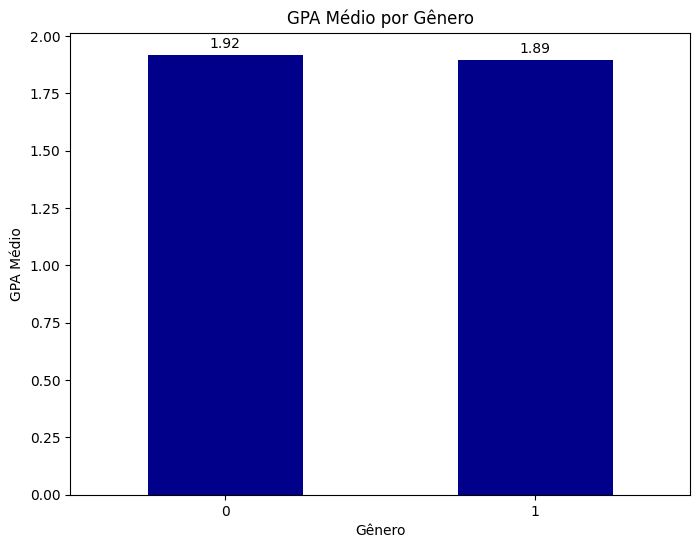

In [ ]:
genero_gpa = df.groupby('Gênero')['GPA'].mean()

ax = genero_gpa.plot(kind='bar', color='darkblue', figsize=(8,6))
ax.set_ylabel('GPA Médio')
ax.set_title('GPA Médio por Gênero')
plt.xticks(rotation=0)
ax.bar_label(ax.containers[0], fmt='%.2f', padding=3)
plt.show()


O GPA médio do gênero masculino (1.92) é maior que o do feminino (1.89).

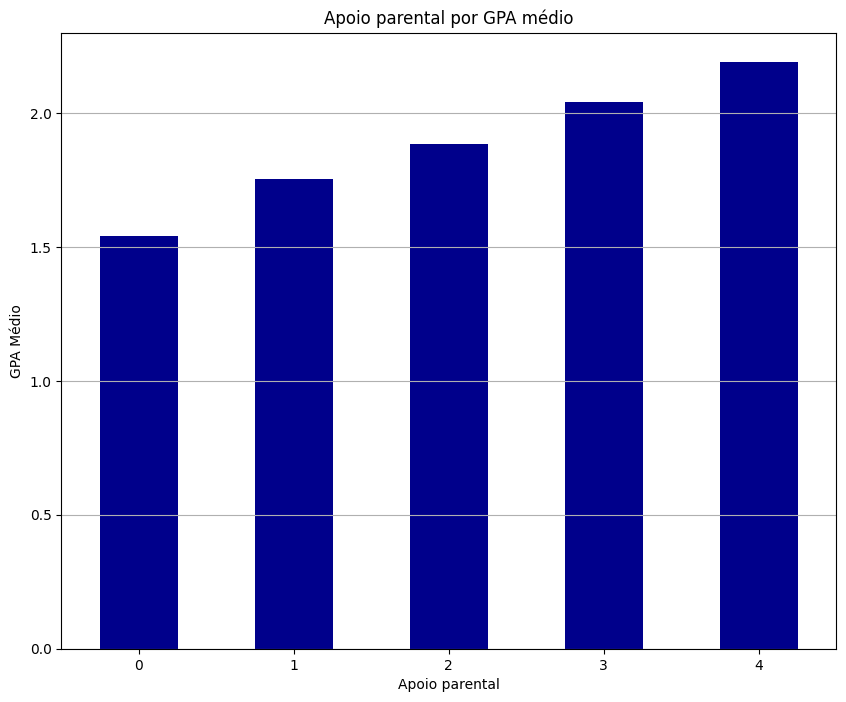

In [ ]:
apoio_gpa = df.groupby('Apoio parental')['GPA'].mean()
apoio_gpa.plot(kind='bar', figsize=(10, 8), color='darkblue')
plt.title('Apoio parental por GPA médio')
plt.ylabel("GPA Médio")
plt.xlabel("Apoio parental")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Quanto maior o apoio parental, maior é o GPA Médio.



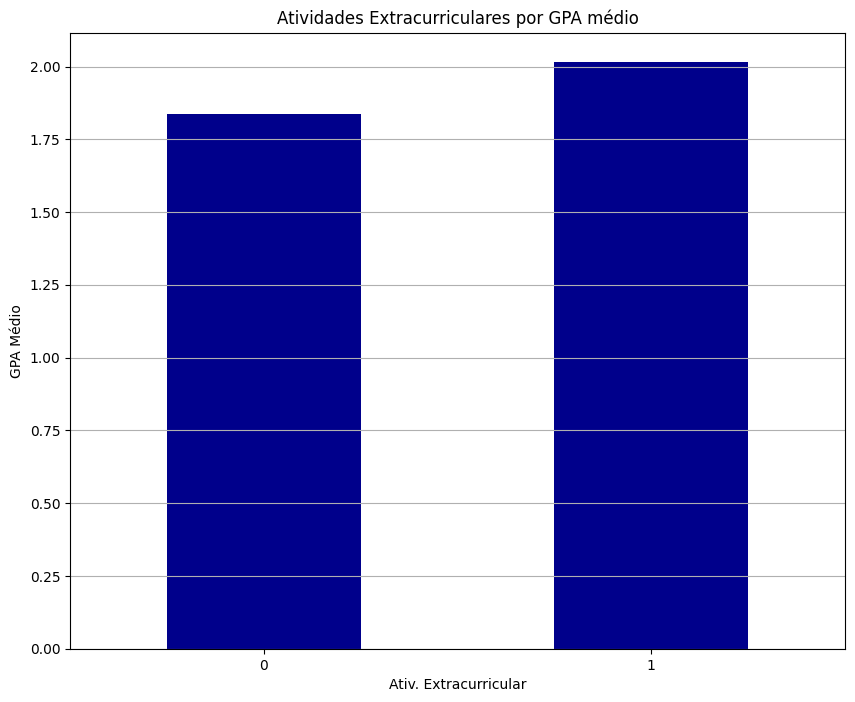

In [ ]:
extracurricular_gpa = df.groupby('Extracurricular')['GPA'].mean()
extracurricular_gpa.plot(kind='bar', figsize=(10, 8), color='darkblue')
plt.title('Atividades Extracurriculares por GPA médio')
plt.ylabel("GPA Médio")
plt.xlabel("Ativ. Extracurricular")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Quem faz atividades extracurriculares tem o GPA médio maior.

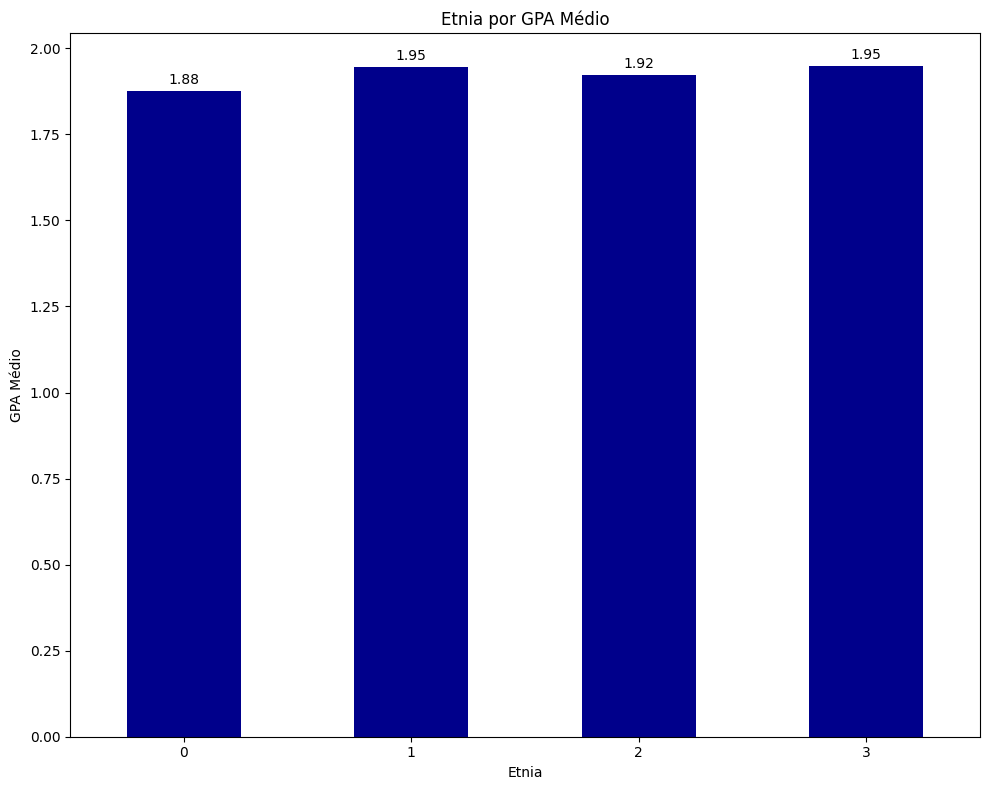

In [ ]:
etnia_gpa = df.groupby('Etnia')['GPA'].mean()

ax = etnia_gpa.plot(kind='bar', figsize=(10, 8), color='darkblue')

ax.bar_label(ax.containers[0], fmt='%.2f', padding=3)

plt.ylabel('GPA Médio')
plt.title('Etnia por GPA Médio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Etnias 1 (afro-americana) e 3 (outras) apresentam os maiores GPAs médios (1.95) e Etnia 0 (caucasiana) apresenta o menor GPA médio (1.88)

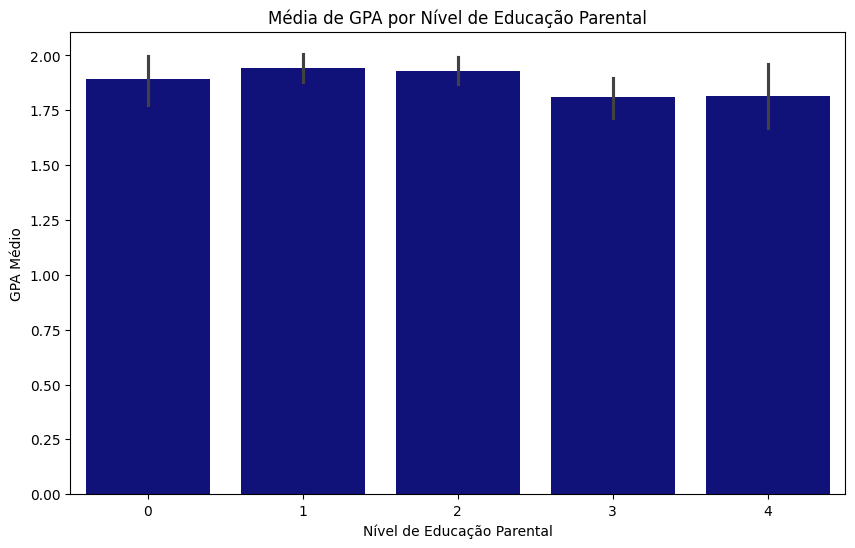

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Educação Parental', y='GPA', data=df, color='darkblue')
plt.title('Média de GPA por Nível de Educação Parental')
plt.xlabel('Nível de Educação Parental')
plt.ylabel('GPA Médio')
plt.show()

Não necessariamente os estudantes que têm pais com maior nível de educação apresentam os maiores GPAs médios.

### Gráfico de linhas

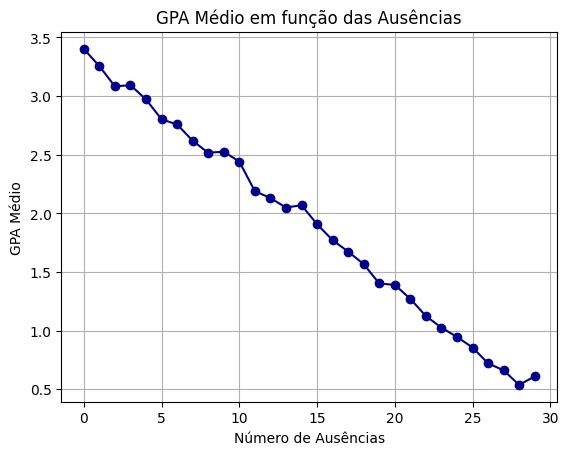

In [ ]:
df_grouped = df.groupby('Ausência')['GPA'].mean().sort_index()

plt.plot(df_grouped.index, df_grouped.values, marker='o', color='darkblue')
plt.xlabel('Número de Ausências')
plt.ylabel('GPA Médio')
plt.title('GPA Médio em função das Ausências')
plt.grid(True)
plt.show()


Quanto mais o aluno falta, mais baixo será o GPA médio dele.

### Gráfico de Dispersão

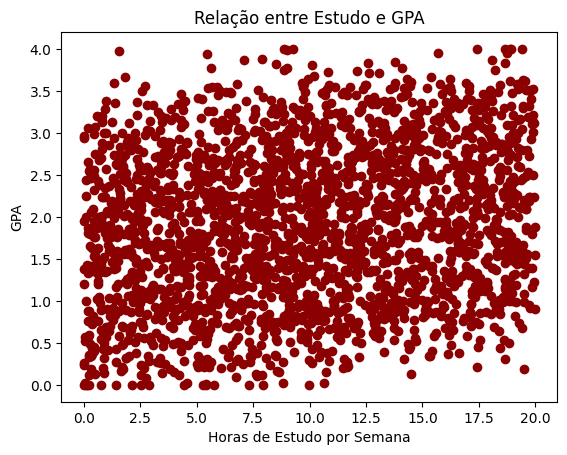

In [ ]:
plt.scatter(df['Horário de Estudos Semanal'], df['GPA'], color='darkred')
plt.xlabel('Horas de Estudo por Semana')
plt.ylabel('GPA')
plt.title('Relação entre Estudo e GPA')
plt.show()

Observamos que a quantidade de horas de estudo por semana não influencia no GPA, visto a alta distribuição no gráfico.

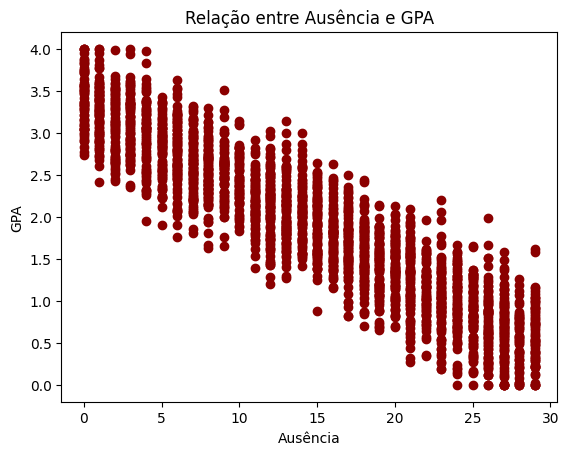

In [ ]:
plt.scatter(df['Ausência'], df['GPA'], color='darkred')
plt.xlabel('Ausência')
plt.ylabel('GPA')
plt.title('Relação entre Ausência e GPA')
plt.show()

Indica uma moderada correlação negativa.

## Relatório Final
**Conclusões e Recomendações**

Observamos uma ausência de correlação entre as variáveis, a que apresenta uma melhor correlação é a do 'GPA' com a 'Ausência', como exibido nos gráficos acima.

O apoio parental apresenta uma influência maior no GPA do que o nível de escolaridade dos pais.

Recomendações de adicionar pesos nas variáveis relacionados com o GPA, a fim de definir melhor suas influências nas relações.